In [1]:
%run ../../main.py
%matplotlib inline

In [2]:
import pandas as pd

from cba.algorithms import M1Algorithm, M2Algorithm, top_rules, createCARs 
from cba.data_structures import TransactionDB
import sklearn.metrics as skmetrics

In [3]:
df = pd.read_csv("c:/code/python/machine_learning/assoc_rules/train/lymph0.csv")

len(df)

130

In [4]:
#
#
# =========================
# Oveření běhu v závislosti na vložených pravidlech / instancích
# =========================
#
#
#

import time

target_rule_count = 50

benchmark_data = {
    "rule_count": [],
    "M1_duration": [],
    "M2_duration": [],
    "M1_accuracy": [],
    "M2_accuracy": [],
    "M1_output_rules": [],
    "M2_output_rules": []
}

number_of_iterations = 10

directory = "c:/code/python/machine_learning/assoc_rules"


for sequence in [*range(10, 20), *range(20, 100, 10), *range(200, 1000, 100), *range(2000, 10000, 1000), *range(20000, 100000, 10000)]:
    target_rule_count = sequence

    dataset_name_benchmark = "lymph0"
    
    pd_ds = pd.read_csv("c:/code/python/machine_learning/assoc_rules/train/{}.csv".format(dataset_name_benchmark))
    pd_ds_test = pd.read_csv("c:/code/python/machine_learning/assoc_rules/test/{}.csv".format(dataset_name_benchmark))
    
    
    txns = TransactionDB.from_DataFrame(pd_ds, unique_transactions=True)
    txns_test = TransactionDB.from_DataFrame(pd_ds_test)
    actual = list(map(lambda i: i.value, txns_test.class_labels))
    
    rules = top_rules(txns.string_representation, appearance=txns.appeardict)

    cars = createCARs(rules)
     
    if len(cars) > target_rule_count:
        cars = cars[:target_rule_count]
        
    

    m1t1 = time.time()
    m1accs = []
    m1rules = []
    for _ in range(number_of_iterations):
        m1 = M1Algorithm(cars, txns)
        clf = m1.build()
        pred = clf.predict_all(txns_test)
        acc = skmetrics.accuracy_score(pred, actual)
        
        m1rules.append(len(clf.rules) + 1)
        m1accs.append(acc)
    
    m1t2 = time.time()
    
    
    m2t1 = time.time()
    m2accs = []
    m2rules = []
    for _ in range(number_of_iterations):
        m2 = M2Algorithm(cars, txns)
        clf = m2.build()
        pred = clf.predict_all(txns_test)
        acc = skmetrics.accuracy_score(pred, actual)
        
        m2rules.append(len(clf.rules) + 1)
        m2accs.append(acc)
        
    
    m2t2 = time.time()
    
     
    m1duration = (m1t2 - m1t1) / number_of_iterations
    m2duration = (m2t2 - m2t1) / number_of_iterations
    m1acc = sum(m1accs) / len(m1accs)
    m2acc = sum(m2accs) / len(m2accs)
    m1rules = sum(m1rules) / number_of_iterations
    m2rules = sum(m2rules) / number_of_iterations
    
    benchmark_data["rule_count"].append(target_rule_count)
    benchmark_data["M1_duration"].append(m1duration)
    benchmark_data["M2_duration"].append(m2duration)
    benchmark_data["M1_accuracy"].append(m1acc)
    benchmark_data["M2_accuracy"].append(m2acc)
    benchmark_data["M1_output_rules"].append(m1rules)
    benchmark_data["M2_output_rules"].append(m2rules)
    
    print("target rule count:", target_rule_count)
    print("M1 duration:", m1duration)
    print("M2 duration:", m2duration)
    print("M1 acc:", m1acc)
    print("M2 acc:", m2acc)
    print("M1 clf len:", m1rules)
    print("M2 clf len:", m2rules)
    
    print("\n\n")

Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 10
M1 duration: 0.0024516105651855467
M2 duration: 0.010109353065490722
M1 acc: 0.611111111111
M2 acc: 0.522222222222
M1 clf len: 10.0
M2 clf len: 10.0



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 11
M1 duration: 0.002500152587890625
M2 duration: 0.009957122802734374
M1 acc: 0.611111111111
M2 acc: 0.522222222222
M1 clf len: 10.0
M2 clf len: 10.0



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 12
M1 duration: 0.0027002811431884764
M2 duration: 0.009156250953674316
M1 acc: 0.611111111111
M2 acc: 0.522222222222
M1 clf len: 10.0
M2 clf len: 10.0




target rule count: 900
M1 duration: 0.025618529319763182
M2 duration: 0.17123608589172362
M1 acc: 0.888888888889
M2 acc: 0.844444444444
M1 clf len: 33.0
M2 clf len: 36.6



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 2000
M1 duration: 0.023867106437683104
M2 duration: 0.19095027446746826
M1 acc: 0.888888888889
M2 acc: 0.844444444444
M1 clf len: 33.0
M2 clf len: 36.6



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 3000
M1 duration: 0.03737649917602539
M2 duration: 0.1551142692565918
M1 acc: 0.888888888889
M2 acc: 0.844444444444
M1 clf len: 33.0
M2 clf len: 36.6



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
t

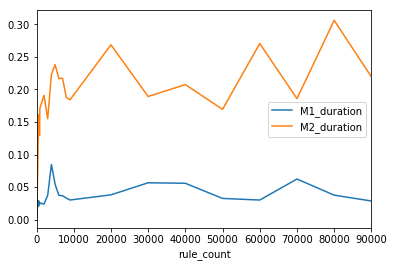

In [7]:
import matplotlib.pyplot as plt

benchmark_data_pd = pd.DataFrame(benchmark_data)

benchmark_data_pd.plot(x=["rule_count"], y=["M1_duration", "M2_duration"])

plt.savefig("../data/m1_m2_podrobne.PNG")

In [8]:
arc_rule_sensitivity = pd.read_csv("../data/arc-rule-sensitivity.csv")

#times_arc = arc_rule_sensitivity[["input rules", "time_rcba", "time_arc", "time_acba"]]
times_arc = arc_rule_sensitivity

times_arc = times_arc.astype({"input rules": int})

times_arc = times_arc.set_index("input rules")

times_arc.head()

,dataset,output_rules_arc,output_rules_rcba,output_rules_acba,time_arc,time_rcba,time_acba,acc_arc,acc_rcba,acc_acba
input rules,,,,,,,,,,
10,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.225,0.170,0.181,0.5,0.5,0.5
11,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.203,0.115,0.164,0.5,0.5,0.5
12,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.286,0.164,0.230,0.5,0.5,0.5
13,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.230,0.131,0.155,0.5,0.5,0.5
14,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.196,0.113,0.150,0.5,0.5,0.5


In [ ]:
benchmark_data_pd.head()

In [9]:
benchmark_data_pd.columns = ["acc_pyARC_m1", "time_pyARC_m1", "output_rules_pyARC_m1", "acc_pyARC_m2", "time_pyARC_m2", "output_rules_pyARC_m2", "input rules"]

benchmark_data_pd = benchmark_data_pd.set_index("input rules")

In [10]:
times_df = benchmark_data_pd.join(times_arc)
times_df

,acc_pyARC_m1,time_pyARC_m1,output_rules_pyARC_m1,acc_pyARC_m2,time_pyARC_m2,output_rules_pyARC_m2,dataset,output_rules_arc,output_rules_rcba,output_rules_acba,time_arc,time_rcba,time_acba,acc_arc,acc_rcba,acc_acba
input rules,,,,,,,,,,,,,,,,
10,0.611111,0.002452,10.0,0.522222,0.010109,10.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.225,0.170,0.181,0.500000,0.500000,0.500000
11,0.611111,0.002500,10.0,0.522222,0.009957,10.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.203,0.115,0.164,0.500000,0.500000,0.500000
12,0.611111,0.002700,10.0,0.522222,0.009156,10.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.286,0.164,0.230,0.500000,0.500000,0.500000
13,0.611111,0.002650,11.0,0.522222,0.009557,11.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.230,0.131,0.155,0.500000,0.500000,0.500000
14,0.666667,0.002904,12.0,0.577778,0.011707,12.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.196,0.113,0.150,0.500000,0.500000,0.500000
15,0.666667,0.003100,13.0,0.577778,0.011710,13.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.192,0.110,0.177,0.500000,0.500000,0.500000
16,0.666667,0.004603,13.0,0.577778,0.013459,13.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.209,0.117,0.155,0.500000,0.500000,0.500000
17,0.722222,0.006304,14.0,0.633333,0.012859,14.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.245,0.132,0.173,0.500000,0.500000,0.500000
18,0.722222,0.004704,14.0,0.633333,0.012108,14.0,C:/code/python/machine_learning/assoc_rules/te...,2,2,2,0.225,0.130,0.159,0.500000,0.500000,0.500000


In [11]:
times_df["input rules"] = times_df.index

labels = ["pyARC - m1", "pyARC - m2", "arc", "rCBA", "arulesCBA"]

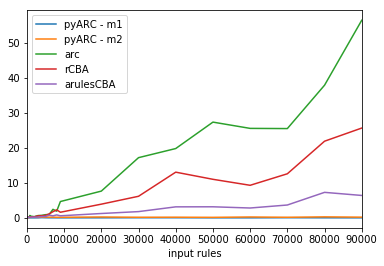

In [12]:
import matplotlib.pyplot as plt

ax = times_df.plot(x=["input rules"], y=["time_pyARC_m1", "time_pyARC_m2", "time_arc", "time_rcba", "time_acba"])
ax.legend(labels)

plt.savefig('../data/rule_sensitivity_plot.png')

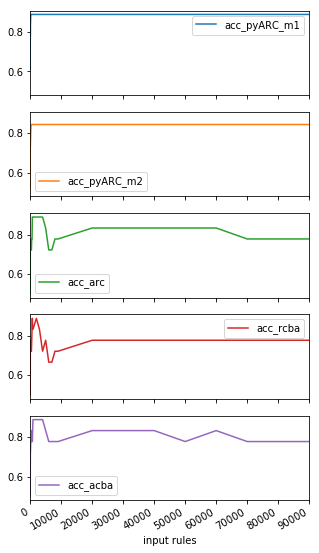

In [13]:
import matplotlib.pyplot as plt

ax = times_df.plot(subplots=True, sharey=True, sharex=True, figsize=(5, 10), x=["input rules"], y=["acc_pyARC_m1", "acc_pyARC_m2", "acc_arc", "acc_rcba", "acc_acba"])



plt.savefig('../data/rule_sensitivity_plot_accuracy.png')

In [ ]:
import matplotlib.pyplot as plt


times_df.plot(subplots=True, sharey=True, sharex=True, figsize=(5, 10), x=["input rules"], y=["output_rules_pyARC_m1", "output_rules_pyARC_m2", "output_rules_arc", "output_rules_rcba", "output_rules_acba"])




plt.savefig('../data/rule_sensitivity_plot_output_rules.png')